In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
# Wavefunction generation
import scf_runs, importlib
modules = [scf_runs]
for m in modules:
    importlib.reload(m)

# Jastrow optimization
import glob
# for fname in glob.glob("*hdf5"):
#     if os.path.isfile(fname):
#         os.remove(fname)
from scf_runs import run_lda_li, run_casci, run_lda_h2
scf_checkfile, opt_checkfile, mf_lda = run_lda_h2()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=12, ncas =6)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
converged SCF energy = -0.856973623578646  <S^2> = 2  2S+1 = 3

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -0.889083104158968  E(CI) = -1.38908310415897  S^2 = 2.0000000
CASCI state   1  E = -0.364954855008619  E(CI) = -0.864954855008619  S^2 = 2.0000000
CASCI state   2  E = -0.201643827163076  E(CI) = -0.701643827163076  S^2 = 2.0000000
CASCI state   3  E = 0.0565908975024743  E(CI) = -0.443409102497526  S^2 = 2.0000000
CASCI state   4  E = 0.164000713865639  E(CI) = -0.335999286134361  S^2 = 2.0000000
CASCI state   5  E = 0.164000713865640  E(CI) = -0.335999286134360  S^2 = 2.0000000
CASCI state   6  E = 0.181211803510002  E(CI) = -0

In [3]:
opt_settings = {'nconfig': 1000,
               'max_iterations':2}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':100,
                'nsteps_per_block':10}

vmc_cusp=True
abvmc_cusp=False

In [4]:
# import wftools, bosonrecipes, importlib, recipes, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools 
# modules = [bosonrecipes,wftools, boson_stochastic_reconfiguration, bosonsamplemany, bosonrecipes, bosonrecipes, bosonslater, bosonwf, bosonaccumulators, bosonjastrowspin, bosonlinemin, bosonmc, bosonmultiplywf, bosonwftools] # Reloads recipes.py file after each update
# for m in modules:
#     importlib.reload(m)
import os, bosonrecipes    
# Jastrow optimization
bosonsj = "boson-test-ovlp-h2.hdf5"    
for fname in [bosonsj]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")
bosonrecipes.ABOPTIMIZE(scf_checkfile, bosonsj, 
                        ci_checkfile=ci_checkfile, 
                        verbose=True,
                        jastrow_kws={"ion_cusp":abvmc_cusp},
                       **opt_settings)
# Jastrow optimization results
# bosonrecipes.read_abopt(bosonsj)

RUNNING VMC OPTIMIZATION
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.028366649528275282
Dot product between gradient and SR step:  0.9167478884082675
descent en -0.888346274416645 0.0005748288515229204
energies from correlated sampling [-0.88896931 -0.88938172 -0.88977871 -0.89016038 -0.89052683]
----------vmc done
Gradient norm:  0.02424469861534064
Dot product between gradient and SR step:  0.9203014347250403
descent en -0.8894563489095371 0.00036061562113073365
energies from correlated sampling [-0.88923375 -0.88954278 -0.88984052 -0.89012702 -0.89040235]


(<multiplywf.MultiplyWF at 0x317e0b290>,
 [{'energy': -0.888346274416645,
   'energy_error': 0.0005748288515229204,
   'x': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]),
   'iteration': 0,
   'nconfig': 1000,
   'pgrad': array([-0.01177014,  0.        , -0.01032364,  0.        , -0.00466409,
           0.        , -0.0008766 ,  0.        , -0.01213604,  0.        ,
          -0.01078731,  0.        , -0.00488521,  0.        , -0.00090304,
           0.        ,  0.01012255,  0.        ,  0.        ,  0.01102018,
           0.        ,  0.        ,  0.00497897,  0.        ,  0.        ]),
   'SRdot': 0.9167478884082675,
   'tau': array([-0.06666667,  0.        ,  0.06666667,  0.13333333,  0.2       ]),
   'yfit': array([-0.88896931, -0.88938172, -0.88977871, -0.89016038, -0.89052683]),
   'est_min': 0.2},
  {'energy': -0.8894563489095371,
   'energy_error': 0.00036061562113073365,
   'x': array([ 0.01248127,  0.   

In [5]:
# import matplotlib.pyplot as plt
# df=recipes.read_opt(bosonsj)
# plt.xlabel('Iteration')
# plt.ylabel('Energy (Ha)')
# plt.title('ABVMC optimization')
# plt.errorbar(df['iteration'], df['energy'], yerr =df['var'])

In [6]:
#ABVMC with jastrows

import bosonrecipes, bosonaccumulators, mc, bosonslater
modules = [bosonrecipes, bosonaccumulators, mc, bosonslater]
for m in modules:
    importlib.reload(m)

# Jastrow optimization
abvmc_file ='abvmc-test-ovlp-h2.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)

opt_settings = {'nconfig': 100,
               'max_iterations':6}
vmc_settings = {'tstep' : 0.3,
                'nconfig': 1000,
                'nblocks':100,
                'nsteps_per_block':10}

abvmc_cusp=False
df_abvmc = bosonrecipes.ABVMC(scf_checkfile, 
                              abvmc_file, 
                              load_parameters=bosonsj, 
                              ci_checkfile=ci_checkfile,
                              verbose=True,  
                              jastrow_kws={"ion_cusp":abvmc_cusp},
                              **vmc_settings)

Using spherical guess
----------------------------------------------------------------------------------------------------vmc done


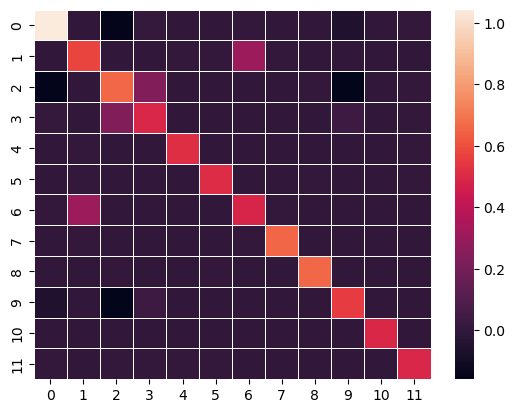

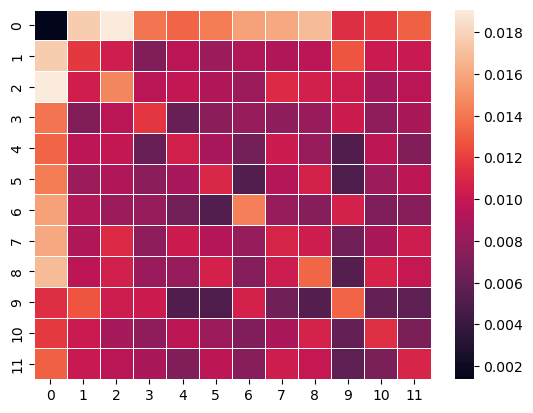

[1.04291908 0.57374846 0.66137364 0.49159007 0.51265635 0.51229808
 0.48760085 0.65764726 0.65809582 0.55050531 0.49531972 0.49345281]


In [7]:
import h5py
abvmc_file ='abvmc-test-ovlp-h2.hdf5'
f = h5py.File(abvmc_file)
matrices = f['excitationsdelta'][...]
ovlp = f['excitationsovlp'][...]
import numpy as np
ovlp_avg = np.mean(ovlp[10:], axis=0)
ovlp_std = np.std(ovlp[10:], axis=0)
import seaborn as sns
ax = sns.heatmap(ovlp_avg, linewidth=0.5)
plt.show()
ax = sns.heatmap(ovlp_std, linewidth=0.5)
plt.show()
print(np.diag(ovlp_avg))


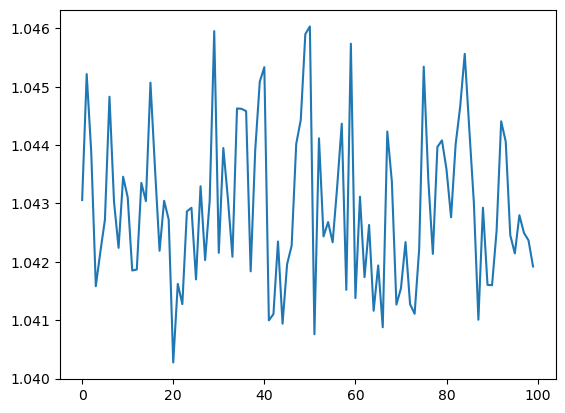

In [9]:
plt.plot(ovlp[...,0,0])
plt.show()


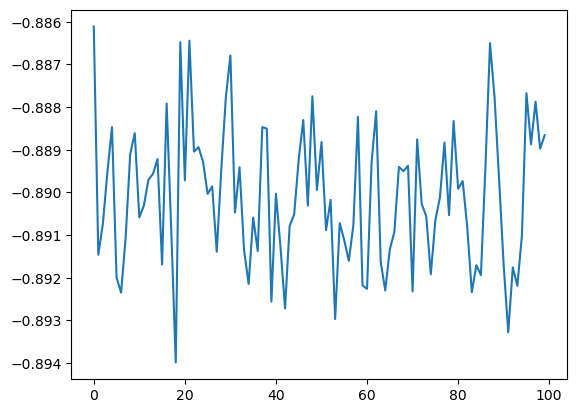

In [8]:
energy = f['energytotal'][...]
plt.plot(energy)
plt.show()